In [29]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Zero-shot Indirect Effect

### prob

In [30]:
with open('./dataset/intervention_data/gpt2_train=False_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [31]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=False_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [32]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [33]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [34]:
df_list = []
mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        df_list.append(df)
        mean_df+=df

        v_arr = np.array(v)
        var_arr[idx,:,:] = v_arr
var_df = pd.DataFrame(var_arr.std(axis=0), index = neuron, columns=layer)
mean_df = mean_df/len(positive_effect)
    

In [35]:
mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,0.006194,-0.002451,0.000408,0.000301,0.000281,0.000283,0.000298,0.000292,0.000278,0.000252,0.000286,0.000293,0.00028
neuron 1,-0.001162,0.000206,0.000412,0.000311,0.000285,0.000305,0.000295,0.000293,0.000313,0.000290,0.000283,0.000278,0.00028
neuron 2,0.001061,0.002450,0.000291,0.000310,0.000292,0.000300,0.000350,0.000325,0.000347,0.000270,0.000275,0.000298,0.00028
neuron 3,-0.000120,-0.000411,-0.000129,0.000306,0.000269,0.000295,0.000305,0.000367,0.000272,0.000285,0.000306,0.000270,0.00028
neuron 4,-0.002698,-0.000348,0.000539,0.000315,0.000288,0.000302,0.000308,0.000292,0.000300,0.000287,0.000276,0.000288,0.00028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.000826,0.000814,0.000311,0.000354,0.000282,0.000295,0.000261,0.000283,0.000284,0.000281,0.000264,0.000283,0.00028
neuron 764,-0.002012,-0.000044,0.000666,0.000358,0.000311,0.000326,0.000306,0.000285,0.000295,0.000278,0.000295,0.000280,0.00028
neuron 765,0.000127,0.000018,0.000139,0.000307,0.000256,0.000217,0.000231,0.000299,0.000164,0.000263,0.000288,0.000291,0.00028
neuron 766,0.001797,0.000303,0.000311,0.000291,0.000278,0.000283,0.000283,0.000298,0.000298,0.000286,0.000283,0.000294,0.00028


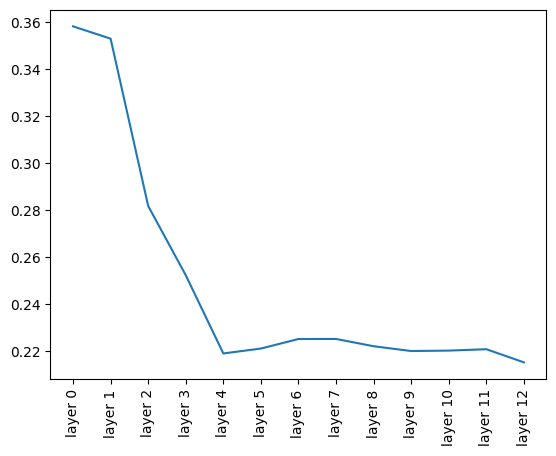

In [36]:
sns.lineplot(mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

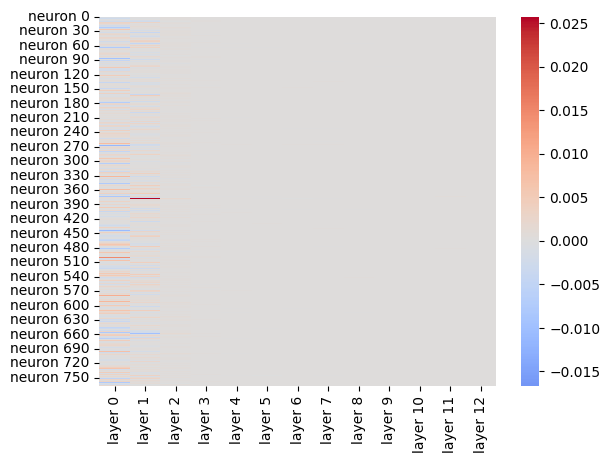

In [37]:
sns.heatmap(mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

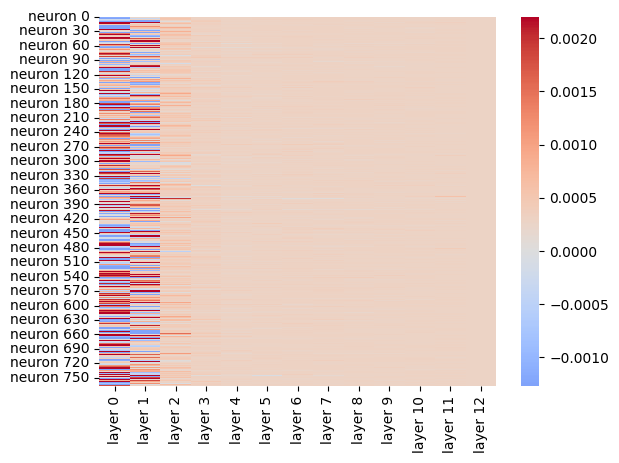

In [38]:
sns.heatmap(mean_df,cmap='coolwarm',robust=True,center=0)

<AxesSubplot: >

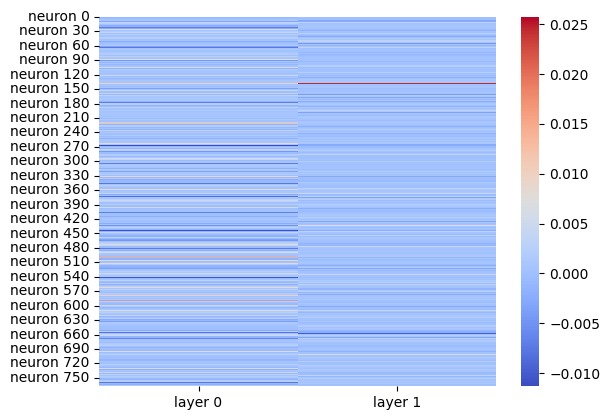

In [39]:
sns.heatmap(mean_df.iloc[:,:2],cmap='coolwarm')

<AxesSubplot: >

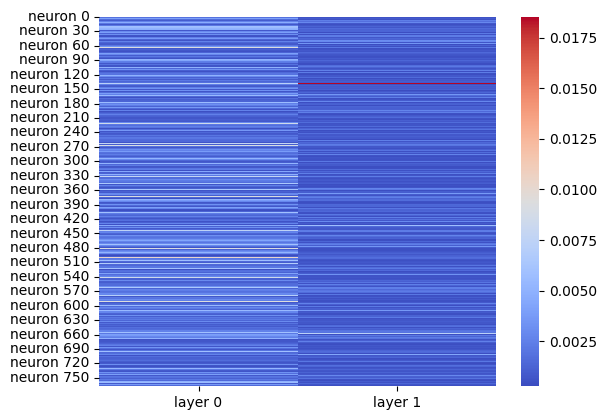

In [40]:
sns.heatmap(var_df.iloc[:,:2],cmap='coolwarm')

## Fine tuning Indirect Effect

### entropy

In [41]:
with open('./dataset/intervention_data/gpt2_train=True_prob.json','rb') as f:
    entropy = json.load(f)
len(entropy)

4412

In [42]:
total_data = pd.read_csv('./dataset/intervention_data/gpt2_train=True_Total.csv')
positive_effect = total_data.loc[total_data['prob']>0].index
negative_effect = total_data.loc[total_data['prob']<0].index

In [43]:
entropy.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [44]:
layer = [f'layer {i}' for i in range(13)]
neuron = [f'neuron {i}' for i in range(768)]
sample_length = len(entropy)

In [45]:
fine_df_list = []
fine_mean_df = pd.DataFrame(np.zeros((len(neuron),len(layer))),index = neuron, columns = layer)
fine_var_arr = np.zeros((sample_length,len(neuron),len(layer)))
for idx,(_,v) in enumerate(entropy.items()):
    if idx in positive_effect:
        df = pd.DataFrame(v, index = neuron, columns=layer)
        fine_df_list.append(df)
        fine_mean_df+=df

        v_arr = np.array(v)
        fine_var_arr[idx,:,:] = v_arr
fine_var_df = pd.DataFrame(fine_var_arr.std(axis=0), index = neuron, columns=layer)
fine_mean_df = fine_mean_df/len(positive_effect)
    

In [46]:
len(fine_df_list)

4278

In [47]:
fine_mean_df

,layer 0,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,layer 11,layer 12
neuron 0,-0.001009,-0.000580,-8.386826e-05,-0.000010,-1.364912e-06,-0.000010,-0.000009,0.000004,0.000004,-0.000018,-0.000014,-1.469336e-05,-0.000009
neuron 1,0.000405,-0.000012,-3.695372e-07,-0.000011,-5.988003e-06,-0.000006,-0.000011,-0.000023,-0.000018,-0.000008,-0.000010,-1.518828e-05,-0.000009
neuron 2,-0.000591,0.000054,-9.823541e-06,0.000018,-1.180890e-05,-0.000007,-0.000013,-0.000003,-0.000007,-0.000010,-0.000015,-1.313300e-05,-0.000009
neuron 3,-0.000330,0.000020,-2.373408e-07,-0.000004,-9.944378e-07,-0.000020,-0.000011,-0.000010,-0.000008,-0.000011,-0.000013,-5.546902e-06,-0.000009
neuron 4,-0.000009,0.000023,-1.138506e-05,0.000044,5.419188e-06,-0.000011,0.000010,0.000008,-0.000004,-0.000010,-0.000008,-6.908427e-06,-0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
neuron 763,0.000097,-0.000005,-2.621483e-06,0.000012,1.858635e-06,-0.000012,-0.000011,-0.000011,-0.000013,-0.000012,-0.000009,-6.782442e-06,-0.000009
neuron 764,0.000193,-0.000018,-7.279920e-06,-0.000010,8.977922e-06,-0.000019,-0.000007,0.000002,0.000002,-0.000005,0.000003,-6.973784e-06,-0.000009
neuron 765,-0.002306,0.000013,-1.835361e-05,-0.000010,-2.376168e-05,-0.000031,-0.000016,-0.000014,-0.000041,-0.000009,-0.000028,-1.265483e-05,-0.000009
neuron 766,0.000120,-0.000083,-1.524937e-05,0.000009,-1.579040e-05,-0.000015,-0.000007,-0.000011,-0.000011,-0.000003,-0.000007,-7.091636e-06,-0.000009


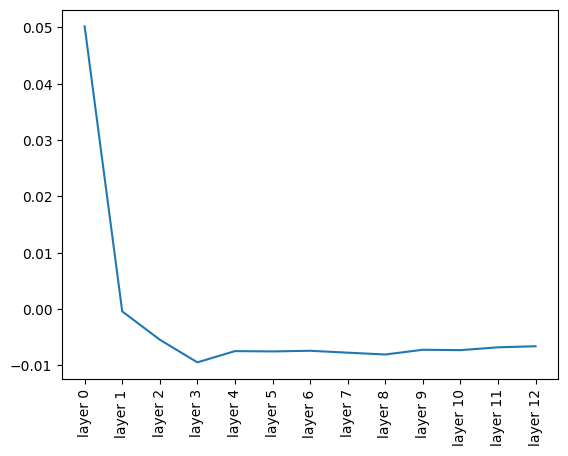

In [48]:
sns.lineplot(fine_mean_df.sum(axis=0))
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot: >

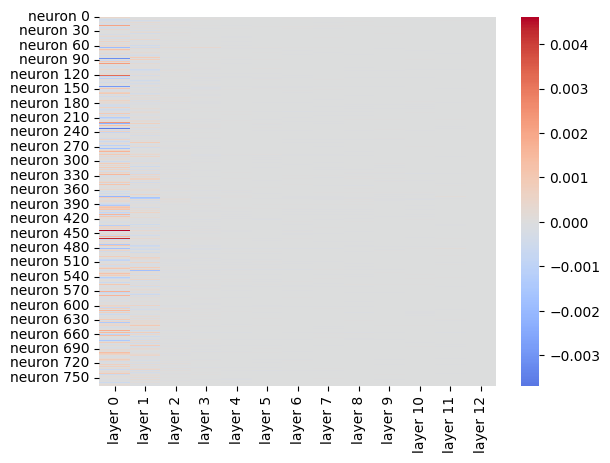

In [49]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0)

<AxesSubplot: >

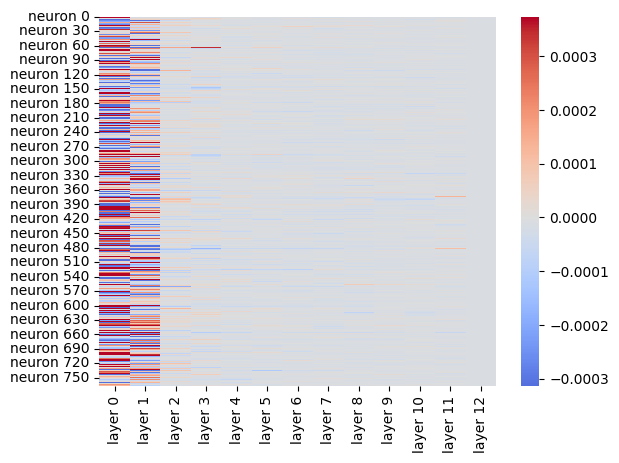

In [50]:
sns.heatmap(fine_mean_df,cmap='coolwarm',center=0,robust=True)

<AxesSubplot: >

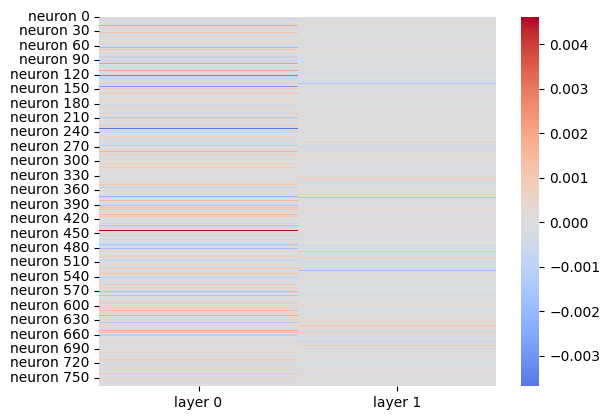

In [51]:
sns.heatmap(fine_mean_df.iloc[:,:2],cmap='coolwarm',center=0)

<AxesSubplot: >

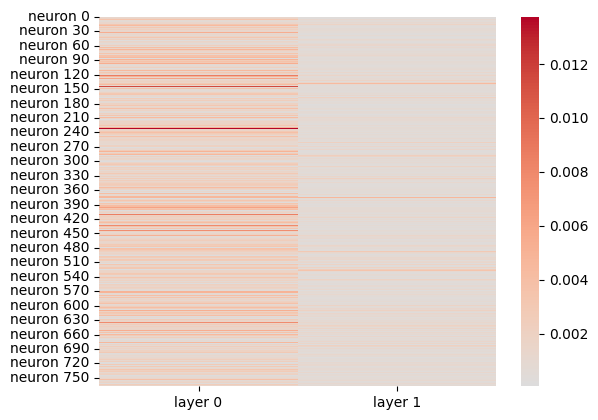

In [52]:
sns.heatmap(fine_var_df.iloc[:,:2],cmap='coolwarm',center=0)

### Fine tuning 전,후 비교

In [53]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 500    0.014809
neuron 536    0.012978
neuron 221    0.012228
neuron 591    0.012172
neuron 94     0.010780
neuron 579    0.010042
neuron 252    0.009902
neuron 138    0.009681
neuron 696    0.009046
neuron 332    0.008806
neuron 592    0.008707
neuron 418    0.008511
neuron 562    0.008393
neuron 263    0.007885
neuron 359    0.007828
neuron 512    0.007785
neuron 104    0.007706
neuron 695    0.007317
neuron 69     0.007256
neuron 88     0.007144
Name: layer 0, dtype: float64

neuron 378    0.025760
neuron 138    0.024569
neuron 447    0.016227
neuron 433    0.007256
neuron 570    0.006421
neuron 701    0.005962
neuron 599    0.005184
neuron 266    0.005153
neuron 367    0.004736
neuron 164    0.004542
neuron 477    0.004542
neuron 535    0.004402
neuron 351    0.004340
neuron 534    0.004242
neuron 610    0.004198
neuron 511    0.004134
neuron 210    0.004018
neuron 457    0.003986
neuron 376    0.003810
neuron 326    0.003801
Name: layer 1, dtype: float64

In [54]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).head(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).head(20))

neuron 444    0.004618
neuron 461    0.004318
neuron 696    0.003658
neuron 264    0.003506
neuron 122    0.003192
neuron 171    0.002597
neuron 220    0.002378
neuron 642    0.002320
neuron 97     0.002220
neuron 368    0.002161
neuron 111    0.002126
neuron 620    0.002114
neuron 189    0.002073
neuron 18     0.002066
neuron 759    0.002065
neuron 652    0.001848
neuron 293    0.001765
neuron 571    0.001755
neuron 48     0.001670
neuron 280    0.001667
Name: layer 0, dtype: float64

neuron 487    0.001179
neuron 121    0.001113
neuron 603    0.001086
neuron 641    0.001029
neuron 85     0.000931
neuron 683    0.000889
neuron 312    0.000878
neuron 302    0.000857
neuron 261    0.000856
neuron 521    0.000834
neuron 656    0.000783
neuron 89     0.000732
neuron 640    0.000721
neuron 638    0.000720
neuron 222    0.000692
neuron 601    0.000679
neuron 90     0.000660
neuron 336    0.000648
neuron 81     0.000647
neuron 525    0.000627
Name: layer 1, dtype: float64

In [55]:
# fine tuning 전
display(mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 305   -0.006885
neuron 22    -0.007042
neuron 178   -0.007208
neuron 406   -0.007238
neuron 481   -0.007247
neuron 572   -0.007471
neuron 719   -0.007480
neuron 760   -0.007598
neuron 64    -0.007673
neuron 346   -0.007701
neuron 656   -0.007996
neuron 373   -0.008457
neuron 50    -0.009056
neuron 480   -0.009197
neuron 87    -0.009736
neuron 266   -0.009999
neuron 447   -0.010179
neuron 541   -0.010445
neuron 444   -0.010765
neuron 267   -0.011334
Name: layer 0, dtype: float64

neuron 13    -0.002833
neuron 167   -0.002848
neuron 602   -0.002877
neuron 582   -0.002991
neuron 523   -0.003040
neuron 557   -0.003067
neuron 7     -0.003118
neuron 425   -0.003143
neuron 503   -0.003172
neuron 666   -0.003200
neuron 98    -0.003309
neuron 375   -0.003433
neuron 607   -0.003440
neuron 199   -0.003554
neuron 33    -0.004028
neuron 161   -0.004196
neuron 55    -0.004462
neuron 676   -0.006013
neuron 678   -0.007821
neuron 658   -0.009964
Name: layer 1, dtype: float64

In [56]:
# fine tuning 후
display(fine_mean_df.iloc[:,0].sort_values(ascending=False).tail(20))
display(fine_mean_df.iloc[:,1].sort_values(ascending=False).tail(20))

neuron 659   -0.001380
neuron 392   -0.001393
neuron 433   -0.001422
neuron 635   -0.001457
neuron 673   -0.001470
neuron 473   -0.001502
neuron 481   -0.001750
neuron 630   -0.001771
neuron 274   -0.001803
neuron 64    -0.001920
neuron 373   -0.002081
neuron 605   -0.002214
neuron 222   -0.002296
neuron 765   -0.002306
neuron 447   -0.002481
neuron 145   -0.002897
neuron 266   -0.003089
neuron 87    -0.003191
neuron 480   -0.003472
neuron 232   -0.003690
Name: layer 0, dtype: float64

neuron 311   -0.000530
neuron 110   -0.000538
neuron 510   -0.000546
neuron 98    -0.000561
neuron 269   -0.000562
neuron 0     -0.000580
neuron 475   -0.000582
neuron 577   -0.000596
neuron 362   -0.000599
neuron 748   -0.000801
neuron 674   -0.000822
neuron 582   -0.000879
neuron 559   -0.000882
neuron 241   -0.000909
neuron 378   -0.001259
neuron 117   -0.001305
neuron 138   -0.001548
neuron 375   -0.001615
neuron 527   -0.001754
neuron 447   -0.002445
Name: layer 1, dtype: float64

# Result
- fine tuning 이후에는 model confidence에 대한 영향력을 골고루 나눠 가짐